# Breast Cancer Prediction - Modeling and Comparison

This notebook focuses on training and evaluating multiple machine learning models to predict breast cancer diagnosis.

The goal is to compare different algorithms and select the best performing model.

In [1]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

We load the processed datasets created in the preprocessing notebook.

In [2]:
X_train, X_test, y_train, y_test = joblib.load("../datasets/processed_breast_cancer.pkl")

We begin by training baseline and advanced classification models.

Each model captures different decision boundaries and feature interactions.

In [3]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)

print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.9824561403508771


In [4]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.956140350877193


In [5]:
svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)

print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.9824561403508771


We compare the trained models based on accuracy.

In [6]:
print("Model Comparison")
print("Logistic Regression:", lr_acc)
print("Random Forest:", rf_acc)
print("SVM:", svm_acc)


Model Comparison
Logistic Regression: 0.9824561403508771
Random Forest: 0.956140350877193
SVM: 0.9824561403508771


Confusion matrices provide detailed insight into class-wise performance.

Best model: Logistic Regression


<Figure size 600x600 with 0 Axes>

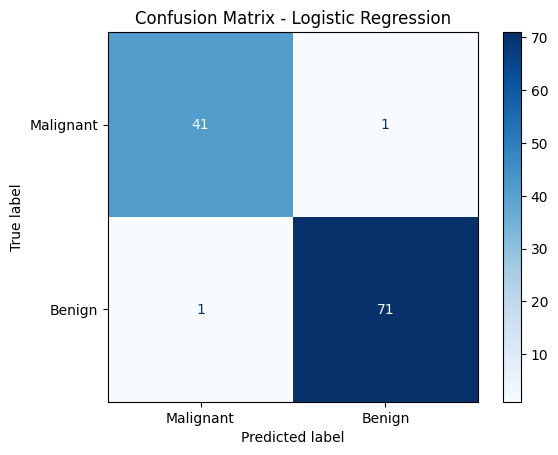

In [7]:
models = {"Logistic Regression": lr_model, "Random Forest": rf_model, "SVM": svm_model}
accuracies = {"Logistic Regression": lr_acc, "Random Forest": rf_acc, "SVM": svm_acc}

best_name = max(accuracies, key=accuracies.get)
best_model = models[best_name]

print("Best model:", best_name)

best_preds = best_model.predict(X_test)

cm = confusion_matrix(y_test, best_preds)

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(cm, display_labels=["Malignant", "Benign"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - " + best_name)
plt.show()

ROC curves illustrate the tradeoff between sensitivity and specificity and are crucial in medical decision systems.

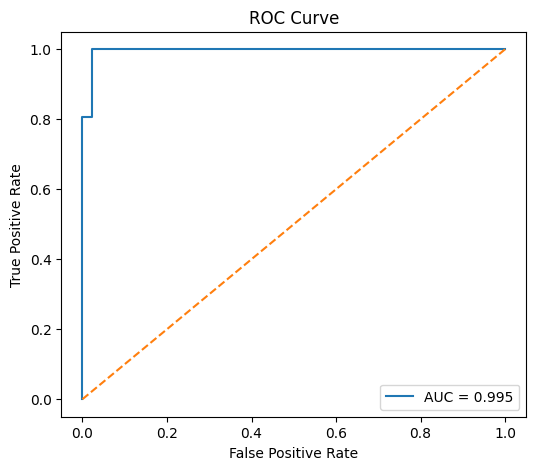

In [8]:
y_prob = best_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

The classification report provides precision, recall, and F1-score for both malignant and benign classes.

In [9]:
print("Classification Report:\n")
print(classification_report(y_test, best_preds, target_names=["Malignant", "Benign"]))

Classification Report:

              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



The best performing model is saved for deployment and further evaluation.

In [10]:
joblib.dump(best_model, "../models/best_model.pkl")
print("Best model saved.")

Best model saved.


In [11]:
joblib.dump(rf_model, "../models/rf_model.pkl")
print("Random Forest model saved.")

Random Forest model saved.


Conclusions:

- Multiple classification models were trained and evaluated.
- The selected model achieved strong predictive performance.
- ROC analysis confirms good separation between malignant and benign cases.
- The chosen model is suitable for medical decision-support experimentation.

The next notebook will focus on final evaluation and interpretation.